# Player evaluation

Here we compare players based on their adjusted points. Also, we calculate some useful metrics using the adjusted points to further evaluate player performance in FPL.

In [1]:
# recent gameweek
gameweek = 5

In [2]:
# import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

pd.set_option('max_columns',100)

In [3]:
# fetch FPL data
filepath = '../data/fpl/data_week' + str(gameweek) + '.csv'
df = pd.read_csv(filepath, index_col=0)

# fetch team data
filepath = '../data/fbref/team_stats_week' + str(gameweek) + '.csv'
teamStats = pd.read_csv(filepath, index_col=0)

# fetch player stats data
filepath = '../data/fbref/player_stats_week' + str(gameweek) + '.csv'
playerStats = pd.read_csv(filepath, index_col=0, skiprows=1)

## Value and value points

Here we calculate two interesting metrics: 'value' and 'value points'. 

Value is simply adjusted points per game divided by the cost of the player. Essentially, this measures how many 'points per pound(/euro/whatever)' has the player gained on an average game week. 

The value points is calculated as the geometric mean of a players adjusted points per game and value. Essentially, in FPL we want to gain the maximum possible amount of points. However, we are restrained by a limited budget, so that in practice we cannot just pick all the best players. Then, we would like to have a squad of players that give the most points given our budget. Thus, we would like to pick players that have high value ('bang for buck'). However, often the players with highest value are very cheap players who somewhat overperform relative to their price. Picking a squad full of these players might leave a part of our budget unused. Calculating the geometric mean of adjusted points and value allows us to weigh both aspects equally, i.e. we want players that both gain a lot of points but also have good value. For example, this metric values equally two players, where one has twice the points per game of the other who in turn has twice the value of the other.

In [4]:
# value = expected points / cost
df['value'] = df['adjusted points per game'] / (df['now_cost'] / 10.0)
# geometric mean of 'adjusted points per game' and 'value'
df['valuePoints metric'] = np.sqrt(df['adjusted points per game'] * df['value'])

In [5]:
goalkeepers = df['element_type'] == 1
defenders = df['element_type'] == 2
midfielders = df['element_type'] == 3
forwards = df['element_type'] == 4

#minGames = df['games played'] >= 0

## Player evaluation

Below we compile lists for each position sorting players based on a given metric.

Notice that 'next1_xP' is currently based on preseason expectations on average player performance!

In [6]:
metric = 'valuePoints metric'
#metric = 'adjusted points per game'
#metric = 'next1_xP'

numberToShow = 40

print('GOALKEEPERS')
display(df[goalkeepers ].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game','next1_xP',\
                                                  'valuePoints metric']].head(numberToShow))
print('DEFENDERS')
display(df[defenders ].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game','next1_xP',\
                                                  'valuePoints metric']].head(numberToShow))
print('MIDFIELDERS')
display(df[midfielders ].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game','next1_xP',\
                                                  'valuePoints metric']].head(numberToShow))
print('FORWARDS')
display(df[forwards ].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game','next1_xP',\
                                                  'valuePoints metric']].head(numberToShow))

GOALKEEPERS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,next1_xP,valuePoints metric
id,,,,,,,,,,
12,Martínez,Aston Villa,48,3.974359,31,24.996391,7.8,6.289415,6.295947,2.870712
325,Darlow,Newcastle Utd,50,5.000000,27,26.802780,5.4,5.360556,5.825085,2.397313
252,Alisson,Liverpool,59,2.982456,17,15.408590,5.7,5.166410,5.752343,2.126977
96,Pope,Burnley,55,3.947368,15,15.523760,3.8,3.932686,3.389154,1.676903
483,Ramsdale,Sheffield Utd,49,5.000000,12,18.445575,2.4,3.689115,2.806988,1.666572
8,Leno,Arsenal,50,5.000000,17,18.236913,3.4,3.647383,3.653620,1.631159
157,Pickford,Everton,50,5.000000,15,18.211899,3.0,3.642380,3.589197,1.628922
213,Meslier,Leeds United,45,5.000000,17,16.810408,3.4,3.362082,2.957429,1.584900
363,McCarthy,Southampton,45,5.000000,18,16.269724,3.6,3.253945,2.799313,1.533924


DEFENDERS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,next1_xP,valuePoints metric
id,,,,,,,,,,
470,Kilman,Wolves,41,2.000000,21,14.715333,10.5,7.357666,7.942842,3.633692
389,Aurier,Tottenham,52,2.000000,13,12.063810,6.5,6.031905,5.999789,2.645165
232,Chilwell,Chelsea,57,2.000000,21,12.139959,10.5,6.069980,6.498650,2.542435
435,Cresswell,West Ham,50,5.000000,29,26.530692,5.8,5.306138,5.437200,2.372977
530,Ivanovic,West Brom,45,1.000000,6,4.930622,6.0,4.930622,4.066011,2.324317
155,Digne,Everton,62,5.000000,27,28.685002,5.4,5.737000,5.549381,2.304035
442,Masuaku,West Ham,45,3.958333,19,19.015792,4.8,4.803990,5.011581,2.264622
277,Cancelo,Manchester City,54,1.000000,8,5.170484,8.0,5.170484,4.724974,2.225022
41,Mings,Aston Villa,52,4.000000,30,19.026112,7.5,4.756528,5.039434,2.085876


MIDFIELDERS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,next1_xP,valuePoints metric
id,,,,,,,,,,
105,Jorginho,Chelsea,52,4.000000,32,29.791014,8.0,7.447754,9.317856,3.266056
33,Hourihane,Aston Villa,60,2.000000,17,13.445419,8.5,6.722710,7.625117,2.744535
37,Grealish,Aston Villa,72,4.000000,38,28.781873,9.5,7.195468,8.466374,2.681593
390,Son,Tottenham,94,5.000000,58,37.715054,11.6,7.543011,7.166597,2.460259
251,Mané,Liverpool,119,3.974359,31,32.702409,7.8,8.228348,8.131435,2.385279
508,Rodríguez,Everton,80,5.000000,39,33.076078,7.8,6.615216,6.101515,2.338832
302,Fernandes,Manchester Utd,105,3.974359,31,28.328755,7.8,7.127880,7.777314,2.199712
254,Salah,Liverpool,123,5.000000,48,37.440517,9.6,7.488103,7.447832,2.135105
450,Fornals,West Ham,64,5.000000,27,26.812501,5.4,5.362500,5.831724,2.119714


FORWARDS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,next1_xP,valuePoints metric
id,,,,,,,,,,
388,Kane,Tottenham,108,5.000000,60,52.757241,12.0,10.551448,9.940276,3.210703
506,Wilson,Newcastle Utd,65,5.000000,36,33.531034,7.2,6.706207,6.393525,2.630391
68,Maupay,Brighton,66,5.000000,34,33.131034,6.8,6.626207,8.769096,2.579248
514,Watkins,Aston Villa,60,4.032258,25,24.191034,6.2,5.999377,7.309266,2.449235
164,Calvert-Lewin,Everton,77,5.000000,43,32.900000,8.6,6.580000,5.911548,2.371267
202,Bamford,Leeds United,58,5.000000,32,26.282069,6.4,5.256414,4.642554,2.182607
377,Adams,Southampton,58,5.000000,21,25.782069,4.2,5.156414,4.732403,2.141084
224,Vardy,Leicester City,100,4.000000,34,26.380000,8.5,6.595000,6.407692,2.085522
166,Richarlison,Everton,79,5.000000,22,26.493103,4.4,5.298621,4.790000,1.885165


Below we compile a list sorting players based on a given metric (irrespective of position).

In [7]:
metric = 'adjusted points per game'

display(df.sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game','next1_xP',\
                                                  'valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,next1_xP,valuePoints metric
id,,,,,,,,,,
388,Kane,Tottenham,108,5.000000,60,52.757241,12.0,10.551448,9.940276,3.210703
251,Mané,Liverpool,119,3.974359,31,32.702409,7.8,8.228348,8.131435,2.385279
390,Son,Tottenham,94,5.000000,58,37.715054,11.6,7.543011,7.166597,2.460259
254,Salah,Liverpool,123,5.000000,48,37.440517,9.6,7.488103,7.447832,2.135105
105,Jorginho,Chelsea,52,4.000000,32,29.791014,8.0,7.447754,9.317856,3.266056
470,Kilman,Wolves,41,2.000000,21,14.715333,10.5,7.357666,7.942842,3.633692
37,Grealish,Aston Villa,72,4.000000,38,28.781873,9.5,7.195468,8.466374,2.681593
302,Fernandes,Manchester Utd,105,3.974359,31,28.328755,7.8,7.127880,7.777314,2.199712
272,De Bruyne,Manchester City,115,2.982456,17,20.960080,5.7,7.027791,5.934649,2.072383


In [8]:
metric = 'valuePoints metric'

display(df.sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game','next1_xP',\
                                                  'valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,next1_xP,valuePoints metric
id,,,,,,,,,,
470,Kilman,Wolves,41,2.000000,21,14.715333,10.5,7.357666,7.942842,3.633692
105,Jorginho,Chelsea,52,4.000000,32,29.791014,8.0,7.447754,9.317856,3.266056
388,Kane,Tottenham,108,5.000000,60,52.757241,12.0,10.551448,9.940276,3.210703
12,Martínez,Aston Villa,48,3.974359,31,24.996391,7.8,6.289415,6.295947,2.870712
33,Hourihane,Aston Villa,60,2.000000,17,13.445419,8.5,6.722710,7.625117,2.744535
37,Grealish,Aston Villa,72,4.000000,38,28.781873,9.5,7.195468,8.466374,2.681593
389,Aurier,Tottenham,52,2.000000,13,12.063810,6.5,6.031905,5.999789,2.645165
506,Wilson,Newcastle Utd,65,5.000000,36,33.531034,7.2,6.706207,6.393525,2.630391
68,Maupay,Brighton,66,5.000000,34,33.131034,6.8,6.626207,8.769096,2.579248


In [9]:
metric = 'next1_xP'

display(df.sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game','next1_xP',\
                                                  'valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,next1_xP,valuePoints metric
id,,,,,,,,,,
388,Kane,Tottenham,108,5.000000,60,52.757241,12.0,10.551448,9.940276,3.210703
105,Jorginho,Chelsea,52,4.000000,32,29.791014,8.0,7.447754,9.317856,3.266056
68,Maupay,Brighton,66,5.000000,34,33.131034,6.8,6.626207,8.769096,2.579248
37,Grealish,Aston Villa,72,4.000000,38,28.781873,9.5,7.195468,8.466374,2.681593
251,Mané,Liverpool,119,3.974359,31,32.702409,7.8,8.228348,8.131435,2.385279
470,Kilman,Wolves,41,2.000000,21,14.715333,10.5,7.357666,7.942842,3.633692
302,Fernandes,Manchester Utd,105,3.974359,31,28.328755,7.8,7.127880,7.777314,2.199712
33,Hourihane,Aston Villa,60,2.000000,17,13.445419,8.5,6.722710,7.625117,2.744535
254,Salah,Liverpool,123,5.000000,48,37.440517,9.6,7.488103,7.447832,2.135105


In [10]:
metric = 'valuePoints metric'

display(df[defenders & (df['now_cost']<47)].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game','next1_xP',\
                                                  'valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,next1_xP,valuePoints metric
id,,,,,,,,,,
470,Kilman,Wolves,41,2.000000,21,14.715333,10.5,7.357666,7.942842,3.633692
530,Ivanovic,West Brom,45,1.000000,6,4.930622,6.0,4.930622,4.066011,2.324317
442,Masuaku,West Ham,45,3.958333,19,19.015792,4.8,4.803990,5.011581,2.264622
46,Konsa,Aston Villa,46,4.000000,28,17.235078,7.0,4.308769,4.438135,2.008974
572,Adarabioyo,Fulham,45,1.000000,2,4.057524,2.0,4.057524,5.414363,1.912735
352,Jack Robinson,Sheffield Utd,44,2.962963,8,11.732857,2.7,3.959839,3.144380,1.887779
486,Dann,Crystal Palace,45,1.000000,7,3.823900,7.0,3.823900,4.030110,1.802604
443,Balbuena,West Ham,44,3.015873,19,11.237911,6.3,3.726255,3.842456,1.776422
558,Coufal,West Ham,45,2.000000,9,7.134070,4.5,3.567035,3.648686,1.681516


## Player Visualizations

In [11]:
game_weeks = np.arange(1,gameweek+1)
column_xPoints = []
for i in range(1,gameweek+1):
    column_xPoints.append('xPoints week ' + str(i))

display(game_weeks)
display(column_xPoints)

array([1, 2, 3, 4, 5])

['xPoints week 1',
 'xPoints week 2',
 'xPoints week 3',
 'xPoints week 4',
 'xPoints week 5']

,assists,bonus,bps,chance_of_playing_next_round,chance_of_playing_this_round,clean_sheets,code,corners_and_indirect_freekicks_order,corners_and_indirect_freekicks_text,cost_change_event,cost_change_event_fall,cost_change_start,cost_change_start_fall,creativity,creativity_rank,creativity_rank_type,direct_freekicks_order,direct_freekicks_text,dreamteam_count,element_type,ep_next,ep_this,event_points,first_name,form,goals_conceded,goals_scored,ict_index,ict_index_rank,ict_index_rank_type,in_dreamteam,influence,influence_rank,influence_rank_type,minutes,news,news_added,now_cost,own_goals,penalties_missed,penalties_order,penalties_saved,penalties_text,photo,points_per_game,red_cards,saves,second_name,selected_by_percent,special,...,yellow_cards,team_name,games played,adjusted points,xG,xG_points,xG_week5,goals_week5,xPoints week 5,clean_sheet_points,xGA_week5,cleansheet_week5,xA,xA_points,xA_week5,assists_week5,adjusted points per game,xPoints week 1,xG_week1,goals_week1,xGA_week1,cleansheet_week1,xA_week1,assists_week1,xPoints week 2,xG_week2,goals_week2,xGA_week2,cleansheet_week2,xA_week2,assists_week2,xPoints week 3,xG_week3,goals_week3,xGA_week3,cleansheet_week3,xA_week3,assists_week3,xPoints week 4,xG_week4,goals_week4,xGA_week4,cleansheet_week4,xA_week4,assists_week4,next1_xP,next5_xP,next10_xP,value,valuePoints metric
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
306,2,2,82,NaN,NaN,0,176297,NaN,NaN,0,0,0,0,96.5,34,25,2.0,NaN,1,3,8.0,8.5,15,Marcus,8.0,12,2,38.6,15,8,False,127.0,31,11,360,NaN,NaN,95,0,0,2.0,0,NaN,176297.jpg,6.5,0,0,Rashford,6.5,False,...,0,Manchester Utd,4.0,19.871895,1.0,5.0,0.8,1.0,12.630881,0.489826,0.6,0.0,0.6,1.8,0.5,2.0,4.967974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.501897,0.0,0.0,1.6,0.0,0.1,0.0,3.100259,0.2,1.0,2.3,0.0,0.0,0.0,2.020242,0.0,0.0,3.9,0.0,0.0,0.0,5.226637,5.111029,5.023424,0.522945,1.611823


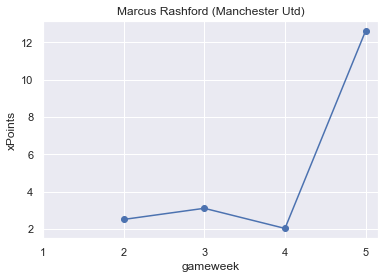

In [19]:
# find player index
name_string = 'Rashford'
playersFound = df[df['web_name'].str.contains(name_string)]
display(playersFound)
# plot xPoints over time
ix = playersFound.index[0]
#ix = 46
plt.plot(game_weeks, df.loc[ix,column_xPoints], marker='o')
title_string = df.loc[ix,'first_name'] + ' ' + df.loc[ix,'second_name'] + ' (' + df.loc[ix,'team_name'] + ')'
plt.title(title_string)
plt.xlabel('gameweek')
plt.ylabel('xPoints')
plt.xticks(game_weeks)
plt.show()

## My team

In [13]:
# find player index
df[df['web_name'].str.contains('Pulisi')]

,assists,bonus,bps,chance_of_playing_next_round,chance_of_playing_this_round,clean_sheets,code,corners_and_indirect_freekicks_order,corners_and_indirect_freekicks_text,cost_change_event,cost_change_event_fall,cost_change_start,cost_change_start_fall,creativity,creativity_rank,creativity_rank_type,direct_freekicks_order,direct_freekicks_text,dreamteam_count,element_type,ep_next,ep_this,event_points,first_name,form,goals_conceded,goals_scored,ict_index,ict_index_rank,ict_index_rank_type,in_dreamteam,influence,influence_rank,influence_rank_type,minutes,news,news_added,now_cost,own_goals,penalties_missed,penalties_order,penalties_saved,penalties_text,photo,points_per_game,red_cards,saves,second_name,selected_by_percent,special,...,yellow_cards,team_name,games played,adjusted points,xG,xG_points,xG_week5,goals_week5,xPoints week 5,clean_sheet_points,xGA_week5,cleansheet_week5,xA,xA_points,xA_week5,assists_week5,adjusted points per game,xPoints week 1,xG_week1,goals_week1,xGA_week1,cleansheet_week1,xA_week1,assists_week1,xPoints week 2,xG_week2,goals_week2,xGA_week2,cleansheet_week2,xA_week2,assists_week2,xPoints week 3,xG_week3,goals_week3,xGA_week3,cleansheet_week3,xA_week3,assists_week3,xPoints week 4,xG_week4,goals_week4,xGA_week4,cleansheet_week4,xA_week4,assists_week4,next1_xP,next5_xP,next10_xP,value,valuePoints metric
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
119,0,0,13,100.0,100.0,0,176413,NaN,NaN,0,0,-2,2,12.5,238,135,NaN,NaN,0,3,1.0,1.5,2,Christian,1.0,2,0,5.9,261,119,False,17.8,287,120,93,NaN,2020-09-14T22:30:19.934227Z,83,0,0,NaN,0,NaN,176413.jpg,1.5,0,0,Pulisic,3.9,False,...,0,Chelsea,2.0,4.264473,0.1,0.5,0.1,0.0,2.910803,0.464473,2.2,0.0,0.1,0.3,0.1,0.0,2.132236,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.1,0.0,0.0,0.0,2.268924,2.175778,2.132343,0.256896,0.74011


In [17]:
my_starting11 = [363,259,77,239,254,272,119,508,469,506,388]
my_subs = [35,200,146,262]

In [18]:
print('STARTING 11')
display(df.loc[my_starting11, ['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game','next1_xP',\
                                                  'valuePoints metric']].head(numberToShow))
print('\nSUBSTITUTES')
display(df.loc[my_subs, ['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game','next1_xP',\
                                                  'valuePoints metric']].head(numberToShow))

STARTING 11


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,next1_xP,valuePoints metric
id,,,,,,,,,,
363,McCarthy,Southampton,45,5.000000,18,16.269724,3.6,3.253945,2.799313,1.533924
259,Alexander-Arnold,Liverpool,75,5.000000,15,17.828965,3.0,3.565793,4.111973,1.302043
77,Lamptey,Brighton,47,5.000000,13,18.102220,2.6,3.620444,5.292803,1.669986
239,Justin,Leicester City,48,5.000000,20,17.348456,4.0,3.469691,3.583695,1.583690
254,Salah,Liverpool,123,5.000000,48,37.440517,9.6,7.488103,7.447832,2.135105
272,De Bruyne,Manchester City,115,2.982456,17,20.960080,5.7,7.027791,5.934649,2.072383
119,Pulisic,Chelsea,83,2.000000,3,4.264473,1.5,2.132236,2.268924,0.740110
508,Rodríguez,Everton,80,5.000000,39,33.076078,7.8,6.615216,6.101515,2.338832
469,Podence,Wolves,56,4.047619,17,15.607458,4.2,3.855960,4.282630,1.629441



SUBSTITUTES


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,next1_xP,valuePoints metric
id,,,,,,,,,,
35,Nyland,Aston Villa,40,NaN,0,NaN,0.0,NaN,NaN,NaN
200,Dallas,Leeds United,45,5.0,13,15.601442,2.6,3.120288,2.430855,1.470918
146,Mitchell,Crystal Palace,42,5.0,13,11.410536,2.6,2.282107,2.488316,1.113554
262,Brewster,Sheffield Utd,45,1.0,1,1.000000,1.0,1.000000,1.000000,0.471405


## Save data

In [16]:
# save data
filepath = '../data/fpl/data_week' + str(gameweek) + str('.csv')
df.to_csv(filepath)